In [1]:
import data.databaseManager as dbMgr

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
fp_data = dbMgr.query("""select t.timeid, season, week, proj.playerid, value as projected, points as actual, position, salary 
                from projections proj
                join contestPlayers cp on proj.playerid = cp.playerid and proj.timeid = cp.timeid
                join contestStructure struc on struc.structureid = cp.structureid
                join time t on t.timeid = proj.timeid and ('FPTS_' || scoring) = statistic
                where platform = 'fanduel'
                and source = 'fantasypros'""")

In [ ]:
""

In [21]:
fftoday_data = dbMgr.query("""select t.timeid, season, week, proj.playerid, value as projected, points as actual, position, salary 
                from projections proj
                join contestPlayers cp on proj.playerid = cp.playerid and proj.timeid = cp.timeid
                join contestStructure struc on struc.structureid = cp.structureid
                join time t on t.timeid = proj.timeid and ('FPTS_' || scoring) = statistic
                where platform = 'fanduel'
                and source = 'fftoday'""")

In [25]:
all_data = fp_data.merge(fftoday_data,on=['timeid','playerid'],suffixes=('','_ff'))

In [27]:
all_data

,timeid,season,week,playerid,projected,actual,position,salary,season_ff,week_ff,projected_ff,actual_ff,position_ff,salary_ff
0,18,2012,1,25,21.25,32.46,QB,7900.0,2012,1,20.0,32.46,QB,7900.0
1,18,2012,1,629,17.32,25.00,QB,7100.0,2012,1,23.0,25.00,QB,7100.0
2,18,2012,1,10,17.32,24.48,QB,8300.0,2012,1,18.4,24.48,QB,8300.0
3,18,2012,1,6,25.14,23.82,QB,9900.0,2012,1,28.8,23.82,QB,9900.0
4,18,2012,1,4,25.23,23.56,QB,9600.0,2012,1,20.8,23.56,QB,9600.0
5,18,2012,1,13,9.76,21.64,QB,6100.0,2012,1,12.4,21.64,QB,6100.0
6,18,2012,1,630,16.88,20.42,QB,8000.0,2012,1,18.8,20.42,QB,8000.0
7,18,2012,1,11,15.92,19.92,QB,6900.0,2012,1,14.9,19.92,QB,6900.0
8,18,2012,1,8,20.51,19.88,QB,8700.0,2012,1,19.4,19.88,QB,8700.0
9,18,2012,1,9,15.54,19.86,QB,6800.0,2012,1,18.4,19.86,QB,6800.0


In [10]:
import pandas as pd

In [13]:
import statsmodels.formula.api as sm

In [28]:
result = sm.ols(formula="actual ~ projected + projected_ff - 1", data = all_data).fit()

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                 3.671e+04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:10:02   Log-Likelihood:                -83407.
No. Observations:               25199   AIC:                         1.668e+05
Df Residuals:                   25197   BIC:                         1.668e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
projected        1.0397      0.018     56.401      0.000       1.004       1.076
projected_ff    -0.0589      0.016     -3.602      0.000      -0.091      -0.027
==============================================================================
Omnibus:                     2461.988   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3561.869
Skew:                           0.764   Prob(JB):                         0.00
Kurtosis:                       4.028   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

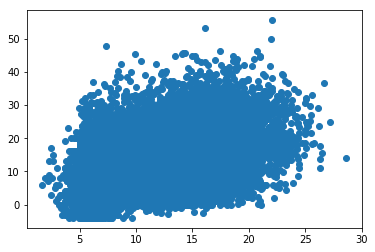

In [9]:
plt.scatter(fp_data['projected'], fp_data['actual'])